In [ ]:
!pip install virtualenv
!virtualenv myenv
!source myenv/bin/activate
!pip install numpy==1.26.4 scipy==1.11.4 pandas==2.2.2 lxml==5.2.2 scikit-learn==1.5.0 joblib==1.4.2 statsmodels==0.14.2 lifelines==0.28.0 pygam==0.9.1 l0bnb==1.0.0 torch==2.3.0 torchvision==0.18.0 pytorch-lightning==2.2.5 torchinfo==1.8.0 torchmetrics==1.4.0.post0 ISLP==0.4.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 kB 12.5 MB/s eta 0:00:00
created virtual environment CPython3.10.12.final.0-64 in 2403ms
  creator CPython3Posix(dest=/content/myenv, clear=False, no_vcs_ignore=False, global=False)
  seeder FromAppData(download=False, pip=bundle, setuptools=bundle, wheel=bundle, via=copy, app_data_dir=/root/.local/share/virtualenv)
    added seed packages: pip==24.3.1, setuptools==75.6.0, wheel==0.45.1
  activators BashActivator,CShellActivator,FishActivator,NushellActivator,PowerShellActivator,PythonActivator
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 43.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from calendar import month_name





In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from calendar import month_name


def read_labor_data(skiprows=11):
    labor_force = pd.read_csv("SeriesReport-20241124103851_63785d.csv", skiprows=skiprows)
    employment = pd.read_csv("SeriesReport-20241124103851_63785d.csv", skiprows=skiprows)

    # Clean column names
    labor_force.columns = ['Year'] + list(range(1, 13))
    employment.columns = ['Year'] + list(range(1, 13))

    # Reshape data
    labor_force_long = pd.melt(labor_force, id_vars=['Year'], var_name='Month', value_name='Labor_Force')
    employment_long = pd.melt(employment, id_vars=['Year'], var_name='Month', value_name='Employment')

    # Combine datasets
    df = pd.merge(labor_force_long, employment_long, on=['Year', 'Month'])

    # Convert 'Year' and 'Month' to numeric, handling errors
    df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
    df['Month'] = pd.to_numeric(df['Month'], errors='coerce')

    # Drop rows with missing values in 'Year' or 'Month'
    df = df.dropna(subset=['Year', 'Month'])

    # Create date column
    df['Date'] = pd.to_datetime(df.apply(lambda x: f"{int(x['Year'])}-{int(x['Month'])}-01", axis=1))
    df = df.sort_values('Date')

    # Convert 'Labor_Force' and 'Employment' to numeric before calculations
    df['Labor_Force'] = pd.to_numeric(df['Labor_Force'].str.replace(',', ''), errors='coerce')  # Remove commas and convert to numeric
    df['Employment'] = pd.to_numeric(df['Employment'].str.replace(',', ''), errors='coerce')    # Remove commas and convert to numeric

    # Calculate additional metrics
    df['Unemployment'] = df['Labor_Force'] - df['Employment']  # Corrected line
    df['Unemployment_Rate'] = (df['Unemployment'] / df['Labor_Force']) * 100
    df['Month_Name'] = df['Date'].dt.strftime('%B')
    df['Decade'] = (df['Year'] // 10) * 10

    # Calculate year-over-year changes
    df['Employment_YoY'] = df.groupby(df['Date'].dt.month)['Employment'].pct_change(periods=12) * 100
    df['Labor_Force_YoY'] = df.groupby(df['Date'].dt.month)['Labor_Force'].pct_change(periods=12) * 100

    return df

# Call the function and assign the result to df
df = read_labor_data()

<ipython-input-52-66405c9d4bff>:46: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Employment_YoY'] = df.groupby(df['Date'].dt.month)['Employment'].pct_change(periods=12) * 100
<ipython-input-52-66405c9d4bff>:47: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Labor_Force_YoY'] = df.groupby(df['Date'].dt.month)['Labor_Force'].pct_change(periods=12) * 100


<ipython-input-35-66405c9d4bff>:46: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Employment_YoY'] = df.groupby(df['Date'].dt.month)['Employment'].pct_change(periods=12) * 100
<ipython-input-35-66405c9d4bff>:47: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Labor_Force_YoY'] = df.groupby(df['Date'].dt.month)['Labor_Force'].pct_change(periods=12) * 100


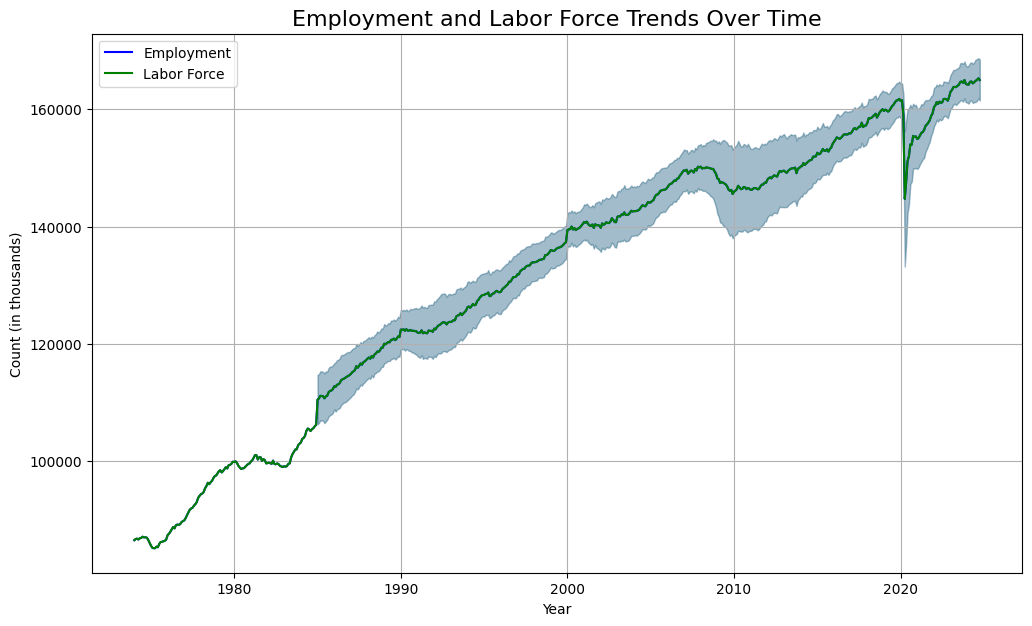

In [ ]:
# 1.1. Employee Trends Visualization

def visualize_trends(df):
    # Plot employment trends over time
    plt.figure(figsize=(12, 7))
    sns.lineplot(data=df, x='Date', y='Employment', label='Employment', color='blue')
    sns.lineplot(data=df, x='Date', y='Labor_Force', label='Labor Force', color='green')
    plt.title("Employment and Labor Force Trends Over Time", fontsize=16)
    plt.xlabel("Year")
    plt.ylabel("Count (in thousands)")
    plt.legend()
    plt.grid()
    plt.show()

df = read_labor_data()
visualize_trends(df)


                mean       std
Month_Name                    
January     1.748347  2.778850
February    1.746352  2.778871
March       1.746575  2.779359
April       1.823029  2.994781
May         1.810541  2.946029
June        1.796301  2.889329
July        1.782510  2.854164
August      1.765141  2.809984
September   1.750851  2.790576
October     1.741357  2.771900
November    1.744241  2.781753
December    1.736351  2.768761


<ipython-input-52-66405c9d4bff>:46: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Employment_YoY'] = df.groupby(df['Date'].dt.month)['Employment'].pct_change(periods=12) * 100
<ipython-input-52-66405c9d4bff>:47: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Labor_Force_YoY'] = df.groupby(df['Date'].dt.month)['Labor_Force'].pct_change(periods=12) * 100


<ErrorbarContainer object of 3 artists>

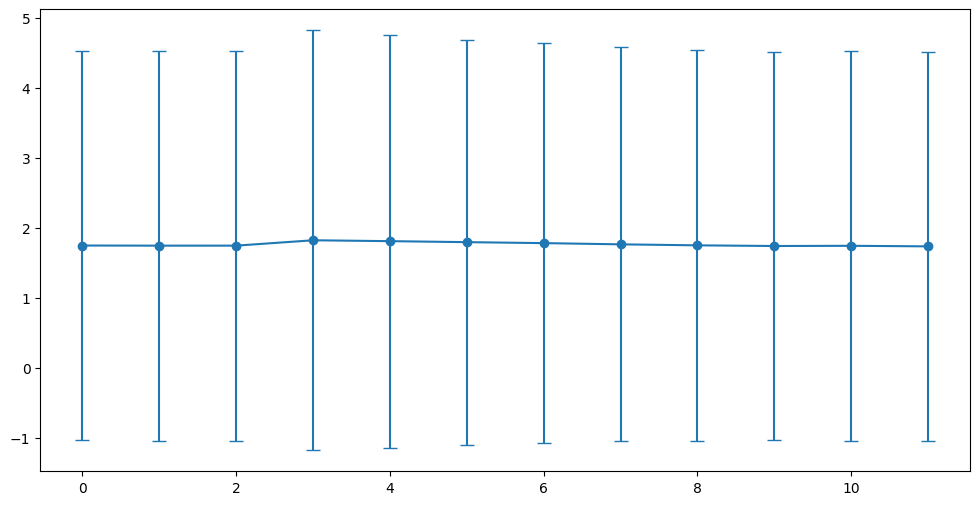

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = read_labor_data()


# Remove rows with negative unemployment rates
df = df[df['Unemployment_Rate'] >= 0]
# Extract month name from a 'Date' column (if needed)
if 'Month_Name' not in df.columns and 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df['Month_Name'] = df['Date'].dt.strftime('%B')
# Group data by month and calculate mean and std
seasonal_patterns = df.groupby('Month_Name')['Unemployment_Rate'].agg(['mean', 'std'])

# Ensure months are sorted in calendar order
month_name = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
seasonal_patterns = seasonal_patterns.reindex(index=month_name)

print(seasonal_patterns)  # Display results

plt.figure(figsize=(12, 6))

# Plot mean unemployment rates with error bars
plt.errorbar(
    range(12),
    seasonal_patterns['mean'],
    yerr=seasonal_patterns['std'],
    fmt='o-',
    capsize=5,
    label='Unemployment Rate'
)




<ipython-input-21-16f0b2f0a711>:3: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['YoY_Employment_Change'] = df.groupby(df['Date'].dt.month)['Employment'].pct_change(periods=12) * 100


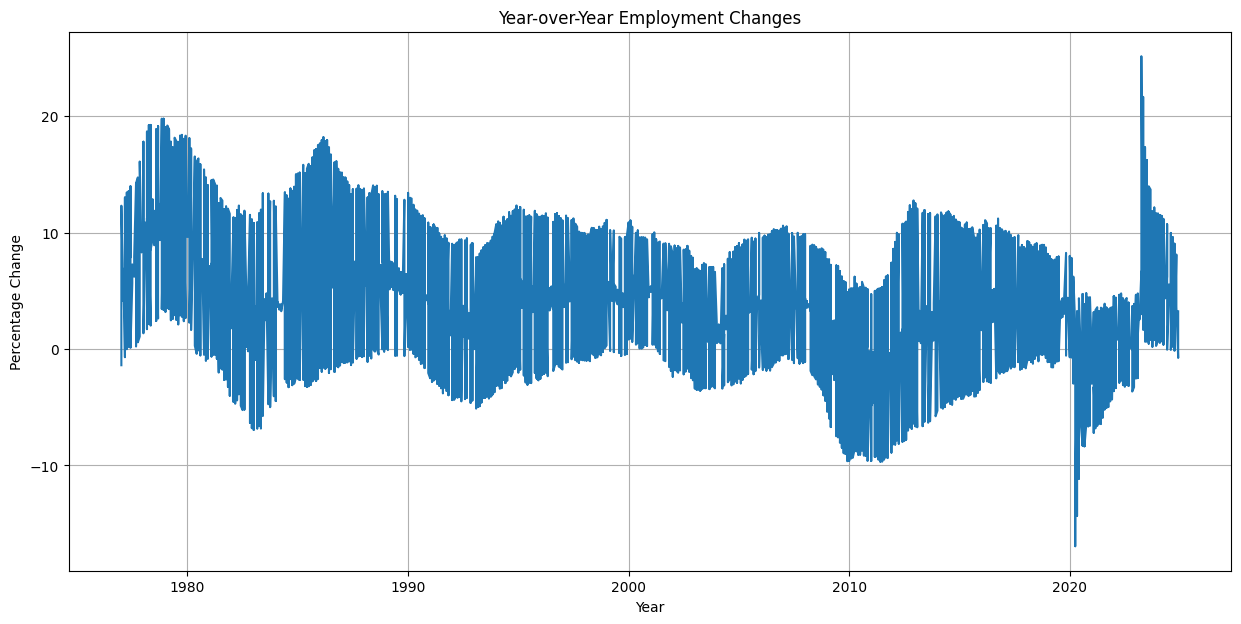

In [ ]:
# 1.3. Economic Change Events Impact
# Calculate year-over-year changes
df['YoY_Employment_Change'] = df.groupby(df['Date'].dt.month)['Employment'].pct_change(periods=12) * 100

plt.figure(figsize=(15, 7))
plt.plot(df['Date'], df['YoY_Employment_Change'])
plt.title('Year-over-Year Employment Changes')
plt.xlabel('Year')
plt.ylabel('Percentage Change')
plt.grid(True)
plt.show()


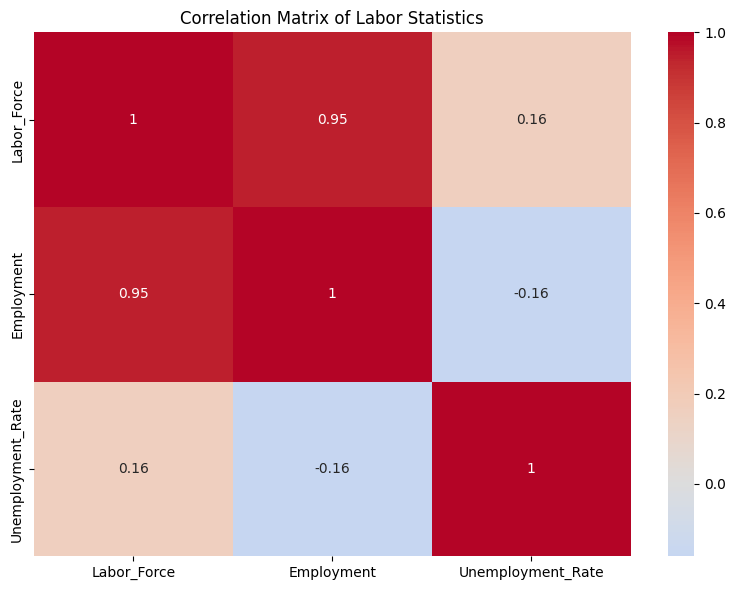

In [ ]:
# 1.4. Correlation Analysis
correlation_matrix = df[['Labor_Force', 'Employment', 'Unemployment_Rate']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Labor Statistics')
plt.tight_layout()
plt.show()

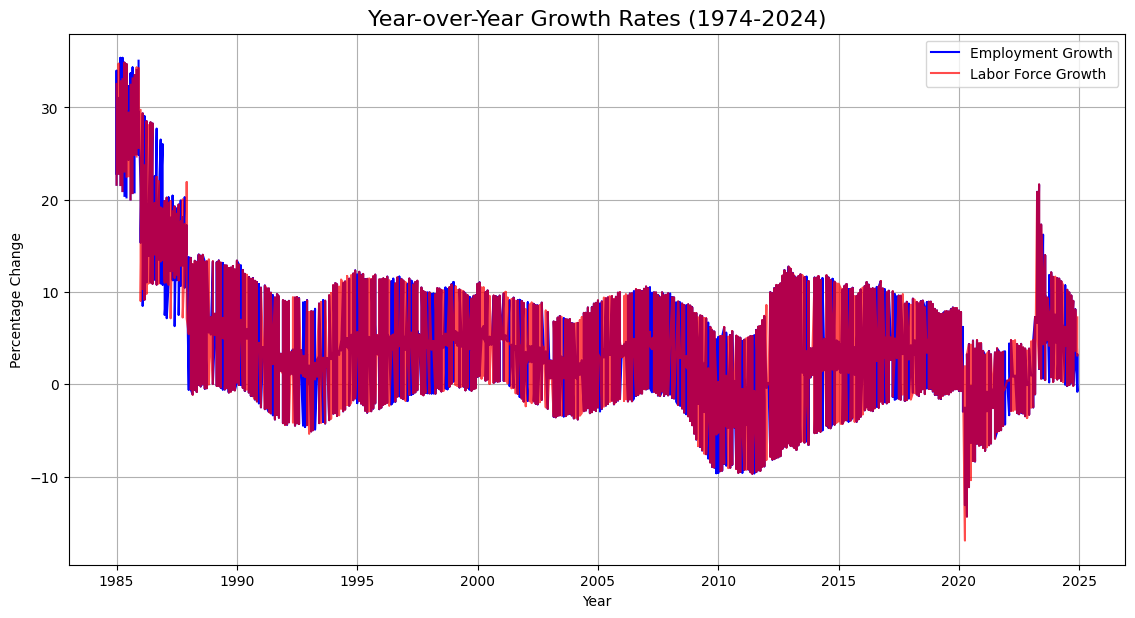

In [ ]:
plt.figure(figsize=(30, 40))
ax4 = plt.subplot2grid((5, 2), (2, 0))
ax4.plot(df['Date'], df['Employment_YoY'], label='Employment Growth', color='blue')
ax4.plot(df['Date'], df['Labor_Force_YoY'], label='Labor Force Growth',
         color='red', alpha=0.7)
ax4.set_title('Year-over-Year Growth Rates (1974-2024)', fontsize=16)
ax4.set_xlabel('Year')
ax4.set_ylabel('Percentage Change')
ax4.legend()
ax4.grid(True)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold # Import KFold here
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#Question 2: Define Your Problem
#Question 2 :  Response variable for a prediction problem

# Define skiprows if necessary based on your data structure
skiprows = 10  # Adjust this based on the actual structure of your CSV files
labor_force = pd.read_csv("SeriesReport-20241124103851_63785d.csv", skiprows=skiprows)
employment = pd.read_csv("SeriesReport-20241124103851_63785d.csv", skiprows=skiprows)

# Clean column names
labor_force.columns = ['Year'] + list(range(1, 13))
employment.columns = ['Year'] + list(range(1, 13))

# Reshape data
labor_force_long = pd.melt(labor_force, id_vars=['Year'],
                              var_name='Month', value_name='Labor_Force')
employment_long = pd.melt(employment, id_vars=['Year'],
                             var_name='Month', value_name='Employment')

# Combine datasets
df = pd.merge(labor_force_long, employment_long, on=['Year', 'Month'])

# Convert 'Labor_Force' and 'Employment' columns to numeric
df['Labor_Force'] = pd.to_numeric(df['Labor_Force'], errors='coerce')
df['Employment'] = pd.to_numeric(df['Employment'], errors='coerce')

# Compute Unemployment and Unemployment Rate
df['Unemployment'] = df['Labor_Force'] - df['Employment']
df['Unemployment_Rate'] = (df['Unemployment'] / df['Labor_Force']) * 100


# Create lagged features (e.g., previous month's employment)
df['Lagged_Employment'] = df['Employment'].shift(1)

# Drop rows with NaN values due to lagging
df.dropna(inplace=True)


# Prepare data for modeling
X = df[['Lagged_Employment']]  # Features
y = df['Unemployment_Rate']  # Target variable

# K-fold cross-validation
n_splits = 5  # Number of cross-validation folds

kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
all_predictions = []
all_true_values = []  # To store the actual y values for evaluation

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model on the training data
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Store predictions and true values for evaluation
    all_predictions.extend(y_pred)
    all_true_values.extend(y_test)

# Evaluate the model using all predictions across folds
mse = mean_squared_error(all_true_values, all_predictions)
print(f"Mean Squared Error (Cross-Validation): {mse}")

for i in range(50):
    print(f"Prediction {i + 1}: {all_predictions[i]:.2f}, Actual: {all_true_values[i]:.2f}")

Mean Squared Error (Cross-Validation): 18.21993830819617
Prediction 1: -0.62, Actual: 0.00
Prediction 2: -0.60, Actual: 0.00
Prediction 3: -0.39, Actual: 0.00
Prediction 4: -0.08, Actual: 4.30
Prediction 5: 0.04, Actual: 4.01
Prediction 6: -0.14, Actual: 0.00
Prediction 7: 0.34, Actual: 4.70
Prediction 8: 0.08, Actual: 0.00
Prediction 9: 0.20, Actual: 0.00
Prediction 10: 0.50, Actual: 8.29
Prediction 11: 0.08, Actual: 0.00
Prediction 12: 0.27, Actual: 0.00
Prediction 13: 0.36, Actual: 0.00
Prediction 14: 0.50, Actual: 0.00
Prediction 15: 0.82, Actual: 3.97
Prediction 16: 0.66, Actual: 0.00
Prediction 17: 0.85, Actual: 4.00
Prediction 18: 0.93, Actual: 3.45
Prediction 19: -0.76, Actual: 0.00
Prediction 20: -1.02, Actual: -5.73
Prediction 21: -0.48, Actual: 0.00
Prediction 22: -0.40, Actual: 0.00
Prediction 23: -0.32, Actual: 0.00
Prediction 24: -0.39, Actual: -4.49
Prediction 25: -0.08, Actual: 0.00
Prediction 26: 0.04, Actual: 0.00
Prediction 27: -0.17, Actual: -4.37
Prediction 28: -0.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# 1. Load Data (with skiprows for headers)
labor_force = pd.read_csv("SeriesReport-20241124103851_63785d.csv", skiprows=skiprows)
employment = pd.read_csv("SeriesReport-20241124103851_63785d.csv", skiprows=skiprows)

# 2. Clean Column Names
labor_force.columns = ['Year'] + list(range(1, 13)) # Changed labor_force_data to labor_force
employment.columns = ['Year'] + list(range(1, 13)) # Changed employment_data to employment

# 3. Reshape Data from Wide to Long Format
labor_force_long = pd.melt(labor_force, id_vars=['Year'], var_name='Month', value_name='Labor_Force') # Changed labor_force_data to labor_force
employment_long = pd.melt(employment, id_vars=['Year'], var_name='Month', value_name='Employment') # Changed employment_data to employment

# 4. Merge Datasets on Year and Month
df = pd.merge(labor_force_long, employment_long, on=['Year', 'Month'])

# 5. Convert to numeric and calculate Unemployment_Rate
df['Labor_Force'] = pd.to_numeric(df['Labor_Force'], errors='coerce')
df['Employment'] = pd.to_numeric(df['Employment'], errors='coerce')
df['Unemployment'] = df['Labor_Force'] - df['Employment']
df['Unemployment_Rate'] = (df['Unemployment'] / df['Labor_Force']) * 100

# 6. Create Lagged Employment Feature (previous month's employment)
df['Lagged_Employment'] = df['Employment'].shift(1)

# 7. Handle NaN values
df.dropna(inplace=True)

# 8. Split Data into Features and Target
X = df[['Lagged_Employment']]
y = df['Unemployment_Rate']

# 9. Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 10. Create Polynomial Features (degree=2 for example)
poly = PolynomialFeatures(degree=2)  # Adjust degree as needed
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# 11. Train a Polynomial Regression Model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# 12. Make Predictions on the Test Set
y_pred = model.predict(X_test_poly)

# 13. Evaluate the Model Performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (Polynomial Regression): {mse}")
print(f"R-squared (Polynomial Regression): {r2}")

Mean Squared Error (Polynomial Regression): 18.25739077993391
R-squared (Polynomial Regression): 0.056295006427079075


In [ ]:
#Question 2: Self-Made predictive analytics problem definition

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

# Example of loading data (make sure the file paths are correct)
# Replace with actual data loading and preprocessing steps
labor_force = pd.read_csv("SeriesReport-20241124103851_63785d.csv", skiprows=skiprows)
employment = pd.read_csv("SeriesReport-20241124103851_63785d.csv", skiprows=skiprows)

# Clean column names and reshape data
labor_force.columns = ['Year'] + list(range(1, 13))
employment.columns = ['Year'] + list(range(1, 13))

# Reshape to long format
labor_force_long = pd.melt(labor_force, id_vars=['Year'], var_name='Month', value_name='Labor_Force')
employment_long = pd.melt(employment, id_vars=['Year'], var_name='Month', value_name='Employment')

# Merge datasets on Year and Month
df = pd.merge(labor_force_long, employment_long, on=['Year', 'Month'])

# Ensure 'Employment' and 'Labor_Force' are numeric before calculating 'Unemployment_Rate'
df['Employment'] = pd.to_numeric(df['Employment'], errors='coerce')
df['Labor_Force'] = pd.to_numeric(df['Labor_Force'], errors='coerce')

# Drop rows with NaN values to avoid issues in calculation
df.dropna(subset=['Employment', 'Labor_Force'], inplace=True)

# Now, calculate 'Unemployment_Rate'
df['Unemployment_Rate'] = 1 - (df['Employment'] / df['Labor_Force'])

# Create target variable for classification (Change in Unemployment Rate)
df['Unemployment_Rate_Change'] = df['Unemployment_Rate'].diff().apply(lambda x: 'Increase' if x > 0 else 'Decrease')
df.dropna(inplace=True)  # Remove NaN values due to diff()

# Ensure 'Employment' and 'Labor_Force' are numeric before calculating 'Unemployment_Rate'
df['Employment'] = pd.to_numeric(df['Employment'], errors='coerce')
df['Labor_Force'] = pd.to_numeric(df['Labor_Force'], errors='coerce')

# Drop rows with NaN values to avoid issues in calculation
df.dropna(subset=['Employment', 'Labor_Force'], inplace=True)

# Now, calculate 'Unemployment_Rate'
df['Unemployment_Rate'] = 1 - (df['Employment'] / df['Labor_Force'])

# Create target variable for classification (Change in Unemployment Rate)
df['Unemployment_Rate_Change'] = df['Unemployment_Rate'].diff().apply(lambda x: 'Increase' if x > 0 else 'Decrease')
df.dropna(inplace=True)  # Remove NaN values due to diff()

# Add this line to recreate the Lagged_Employment column
df['Lagged_Employment'] = df['Employment'].shift(1)
df.dropna(inplace=True)  # Remove NaN values introduced by shift()

# Feature and target variable selection for regression and classification
X = df[['Lagged_Employment']]  # Example feature for regression (use Lagged Employment or other features)
y = df['Unemployment_Rate']

# Split data for both regression and classification
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_cls_train, X_cls_test, y_cls_train, y_cls_test = train_test_split(
    X, df['Unemployment_Rate_Change'], test_size=0.2, random_state=42
)

# Polynomial Regression (Example for Polynomial Feature Transformation)
poly = PolynomialFeatures(degree=2)  # Example degree
X_poly_train = poly.fit_transform(X_reg_train)
X_poly_test = poly.transform(X_reg_test)

# Train a Linear Regression model on polynomial features
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_poly_train, y_reg_train)

# Make predictions on the test set
y_reg_pred = poly_reg_model.predict(X_poly_test)

# Evaluate the Polynomial Regression Model
mse = mean_squared_error(y_reg_test, y_reg_pred)
r2 = r2_score(y_reg_test, y_reg_pred)
print(f"Polynomial Regression Mean Squared Error: {mse}")
print(f"Polynomial Regression R-squared: {r2}")

# Logistic Regression (For Classification)
cls_model = LogisticRegression()
cls_model.fit(X_cls_train, y_cls_train)
y_cls_pred = cls_model.predict(X_cls_test)

# Evaluate the Logistic Regression Model
accuracy = accuracy_score(y_cls_test, y_cls_pred)
print(f"Logistic Regression Accuracy: {accuracy}")


Polynomial Regression Mean Squared Error: 0.0016445121272377719
Polynomial Regression R-squared: 0.035934724030499576
Logistic Regression Accuracy: 0.6177884615384616


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler  # Import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix
from sklearn.svm import SVC

# Question 3: Justifying Model Selections

# 1. Load Data (with skiprows for headers)
labor_force = pd.read_csv("SeriesReport-20241124103851_63785d.csv", skiprows=skiprows)
employment = pd.read_csv("SeriesReport-20241124103851_63785d.csv", skiprows=skiprows)

# 2. Clean column names and reshape data to long format
labor_force.columns = ['Year'] + list(range(1, 13))
employment.columns = ['Year'] + list(range(1, 13))

labor_force_long = pd.melt(labor_force, id_vars=['Year'], var_name='Month', value_name='Labor_Force')
employment_long = pd.melt(employment, id_vars=['Year'], var_name='Month', value_name='Employment')

# 3. Merge datasets on Year and Month
df = pd.merge(labor_force_long, employment_long, on=['Year', 'Month'])

# 4. Ensure 'Employment' and 'Labor_Force' are numeric before calculating 'Unemployment_Rate'
df['Employment'] = pd.to_numeric(df['Employment'], errors='coerce')
df['Labor_Force'] = pd.to_numeric(df['Labor_Force'], errors='coerce')

# Drop rows with NaN values in 'Employment' and 'Labor_Force' to avoid issues in calculation
df.dropna(subset=['Employment', 'Labor_Force'], inplace=True)

# Now, calculate 'Unemployment_Rate'
df['Unemployment_Rate'] = 1 - (df['Employment'] / df['Labor_Force'])
df['Unemployment_Rate_Change'] = df['Unemployment_Rate'].diff().apply(lambda x: 'Increase' if x > 0 else 'Decrease')

# Drop any NaN values introduced by diff()
df.dropna(inplace=True)

# 5. Feature Engineering: Lagged Employment for Regression Model
df['Lagged_Employment'] = df['Employment'].shift(1)

# Drop any NaN values introduced by shift()
df.dropna(inplace=True)

# 6. Prepare feature and target variables
X = df[['Lagged_Employment']]  # Feature: Lagged Employment
y = df['Unemployment_Rate']  # Target for regression (Unemployment Rate)
y_cls = df['Unemployment_Rate_Change']  # Target for classification

# 7. Split data into training and testing sets for both regression and classification
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_cls_train, X_cls_test, y_cls_train, y_cls_test = train_test_split(X, y_cls, test_size=0.2, random_state=42) # Define X_cls_train and other classification variables

# 8. Polynomial Regression (with polynomial feature transformation)
poly = PolynomialFeatures(degree=2)  # Create polynomial features
X_poly_train = poly.fit_transform(X_reg_train)
X_poly_test = poly.transform(X_reg_test)

# Train a Linear Regression model on polynomial features
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_poly_train, y_reg_train)

# Make predictions and evaluate Polynomial Regression
y_reg_pred = poly_reg_model.predict(X_poly_test)
mse = mean_squared_error(y_reg_test, y_reg_pred)
r2 = r2_score(y_reg_test, y_reg_pred)

print(f"Polynomial Regression Mean Squared Error: {mse}")
print(f"Polynomial Regression R-squared: {r2}")

# 9. Logistic Regression (for Classification)
cls_model = LogisticRegression()
cls_model.fit(X_cls_train, y_cls_train)
y_cls_pred = cls_model.predict(X_cls_test)

# 10. Support Vector Machine (SVM) for Classification
svm_model = SVC()  # Create an instance of the SVM classifier
svm_model.fit(X_cls_train, y_cls_train)  # Train the SVM model
y_svm_pred = svm_model.predict(X_cls_test)  # Make predictions using SVM

# Evaluate the SVM Model for Classification
svm_accuracy = accuracy_score(y_cls_test, y_svm_pred)  # Accuracy of the SVM model
svm_conf_matrix = confusion_matrix(y_cls_test, y_svm_pred)  # Confusion matrix for SVM

print(f"SVM Accuracy: {svm_accuracy}")
print(f"SVM Confusion Matrix:\n{svm_conf_matrix}")


Polynomial Regression Mean Squared Error: 0.0016445121272377719
Polynomial Regression R-squared: 0.035934724030499576
SVM Accuracy: 0.6730769230769231
SVM Confusion Matrix:
[[147  76]
 [ 60 133]]


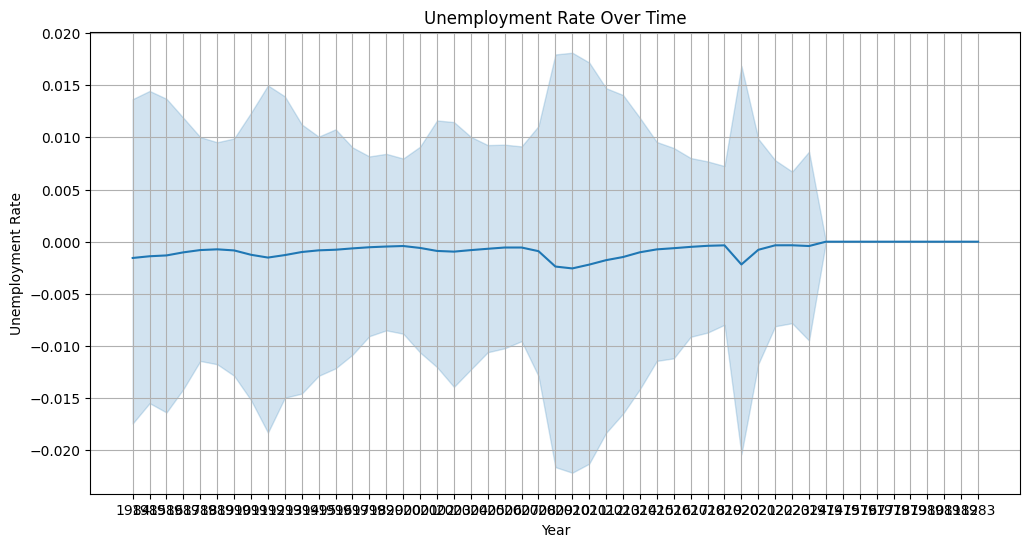

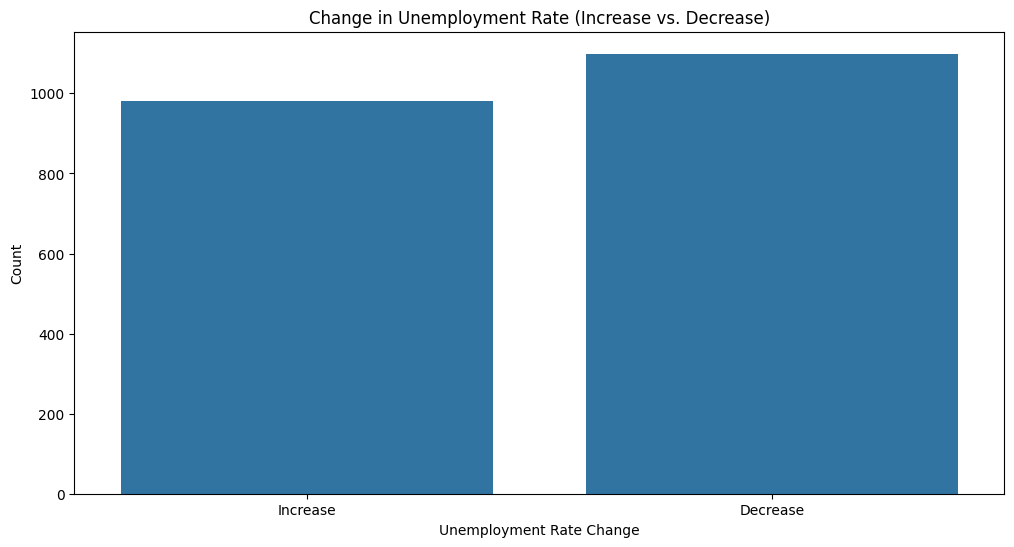

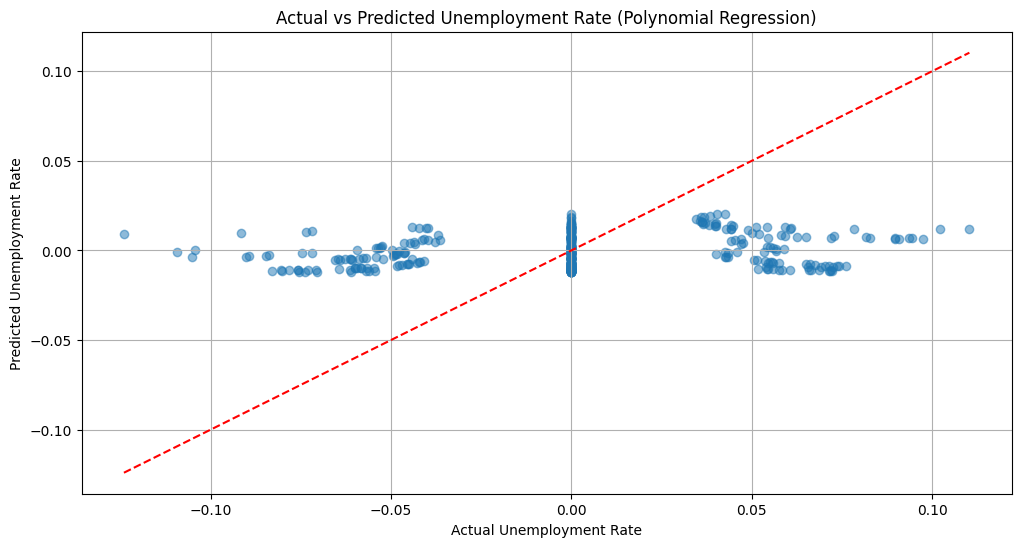

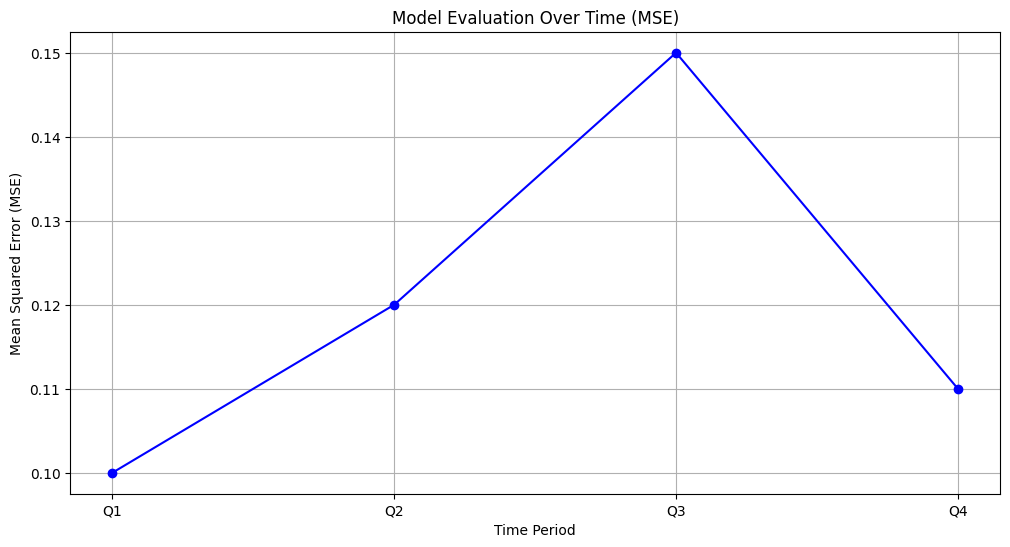

In [ ]:
#Question 4:Drawing a Data-Driven Conclusion


import matplotlib.pyplot as plt
import seaborn as sns

# Plot Unemployment Rate over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=df['Year'], y=df['Unemployment_Rate'])
plt.title('Unemployment Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.grid(True)
plt.show()


# Plot Unemployment Rate Change: Increase vs. Decrease
plt.figure(figsize=(12, 6))
sns.countplot(x='Unemployment_Rate_Change', data=df)
plt.title('Change in Unemployment Rate (Increase vs. Decrease)')
plt.xlabel('Unemployment Rate Change')
plt.ylabel('Count')
plt.show()


# Plot actual vs predicted values for Polynomial Regression
plt.figure(figsize=(12, 6))
plt.scatter(y_reg_test, y_reg_pred, alpha=0.5)
plt.plot([min(y_reg_test), max(y_reg_test)], [min(y_reg_test), max(y_reg_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted Unemployment Rate (Polynomial Regression)')
plt.xlabel('Actual Unemployment Rate')
plt.ylabel('Predicted Unemployment Rate')
plt.grid(True)
plt.show()


# Plot MSE over time (this is just an example of how to visualize model drift)
plt.figure(figsize=(12, 6))
# Here, imagine we have tracked MSE for each period (you can log these values over time)
mse_values = [0.1, 0.12, 0.15, 0.11]  # Example MSE values for each evaluation period
time_periods = ['Q1', 'Q2', 'Q3', 'Q4']  # Example time periods
plt.plot(time_periods, mse_values, marker='o', color='b')
plt.title('Model Evaluation Over Time (MSE)')
plt.xlabel('Time Period')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.show()
